In [66]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os

# Importing dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Scaling
from sklearn.preprocessing import RobustScaler, LabelEncoder

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/kaggle/input/video-game-stocks-financial-market-data/Top10VideoGameStocks.csv


In [11]:
# Load the data
data = pd.read_csv("/kaggle/input/video-game-stocks-financial-market-data/Top10VideoGameStocks.csv")
data.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


# Exploring the data

# Fields and data types 🗒️:

- **Date**: The date of the stock data, formatted as `YYYY-MM-DD` (e.g., 2000-01-01), `object`  
- **Company**: Name of the company (e.g., Sony Interactive Entertainment), `object`  
- **Ticker Symbol**: The ticker symbol used for trading (e.g., SONY), `object`  
- **Currency**: The currency in which the stock is traded (e.g., JPY for Japanese Yen), `object`  
- **Open**: Opening price of the stock on the given date, `float`  
- **High**: Highest price of the stock during the trading day, `float`  
- **Low**: Lowest price of the stock during the trading day, `float`  
- **Close**: Closing price of the stock on the given date, `float`  
- **Adj Close**: Adjusted closing price accounting for dividends and stock splits, `float`  
- **Volume**: Total number of shares traded during the trading day, `integer`  

In [13]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Understanding Data

In [16]:
data.shape

(2209, 10)

# Now i going to checking the number of unique values in each column

In [17]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Date,298
Company,10
Ticker Symbol,10
Currency,4
Open,2052
High,2043
Low,2071
Close,2081
Adj Close,2166
Volume,2206


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2209 non-null   object 
 1   Company        2209 non-null   object 
 2   Ticker Symbol  2209 non-null   object 
 3   Currency       2209 non-null   object 
 4   Open           2209 non-null   float64
 5   High           2209 non-null   float64
 6   Low            2209 non-null   float64
 7   Close          2209 non-null   float64
 8   Adj Close      2209 non-null   float64
 9   Volume         2209 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 172.7+ KB


In [19]:
# Renames the dataset and removes the space
data=data.rename(columns={
    "Ticker Symbol":"Ticker_Symbol",
    "Adj Close":"Adj_Close"
    })
data.head()

,Date,Company,Ticker_Symbol,Currency,Open,High,Low,Close,Adj_Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [21]:
print("=".center(50, "="))
cat_cols = ['Company', 'Ticker_Symbol', 'Currency']
num_cols = ['Open', 'High', 'Low', 'Adj_Close', 'Volume']
target_col = ['Close']  
print("The categorical cols are : ", cat_cols)
print("The continuous cols are : ", num_cols)
print("The target variable is :  ", target_col if target_col else "None")
print("=".center(50, "="))

The categorical cols are :  ['Company', 'Ticker_Symbol', 'Currency']
The continuous cols are :  ['Open', 'High', 'Low', 'Adj_Close', 'Volume']
The target variable is :   ['Close']


# Summary Statistics

In [22]:
data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2209.0,5.608233e+01,8.855228e+01,0.032000,8.374000e+00,2.236200e+01,5.727600e+01,6.434558e+02
High,2209.0,6.040325e+01,9.508668e+01,0.032000,9.225000e+00,2.450000e+01,6.173200e+01,7.148997e+02
Low,2209.0,5.212389e+01,8.269868e+01,0.025500,7.520000e+00,2.007000e+01,5.396000e+01,6.107299e+02
Adj_Close,2209.0,5.425582e+01,8.752955e+01,0.025868,7.123526e+00,1.864187e+01,5.536884e+01,6.136022e+02
Volume,2209.0,2.677228e+08,4.027909e+08,0.000000,3.879940e+07,8.711250e+07,3.528646e+08,3.044579e+09


# Missing values

In [23]:
data.isnull().sum()

Date             0
Company          0
Ticker_Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj_Close        0
Volume           0
dtype: int64

# EDA (Exploratory Data Analysis)

In [25]:
print("=".center(50, "="))
print('Company : ', data['Company'].unique())
print('Ticker_Symbol : ', data['Ticker_Symbol'].unique())
print('Currency : ', data['Currency'].unique())
print("=".center(50, "="))

Company :  ['Sony Interactive Entertainment' 'Tencent Interactive Entertainment'
 'Microsoft Gaming' 'Nintendo' 'NetEase Games' 'Electronic Arts'
 'Take-Two Interactive' 'Embracer Group' 'Roblox Corporation' 'Playtika']
Ticker_Symbol :  ['SONY' '0700.HK' 'MSFT' 'NTDOY' 'NTES' 'EA' 'TTWO' 'EMBRAC-B.ST' 'RBLX'
 'PLTK']
Currency :  ['JPY' 'HKD' 'USD' 'SEK']


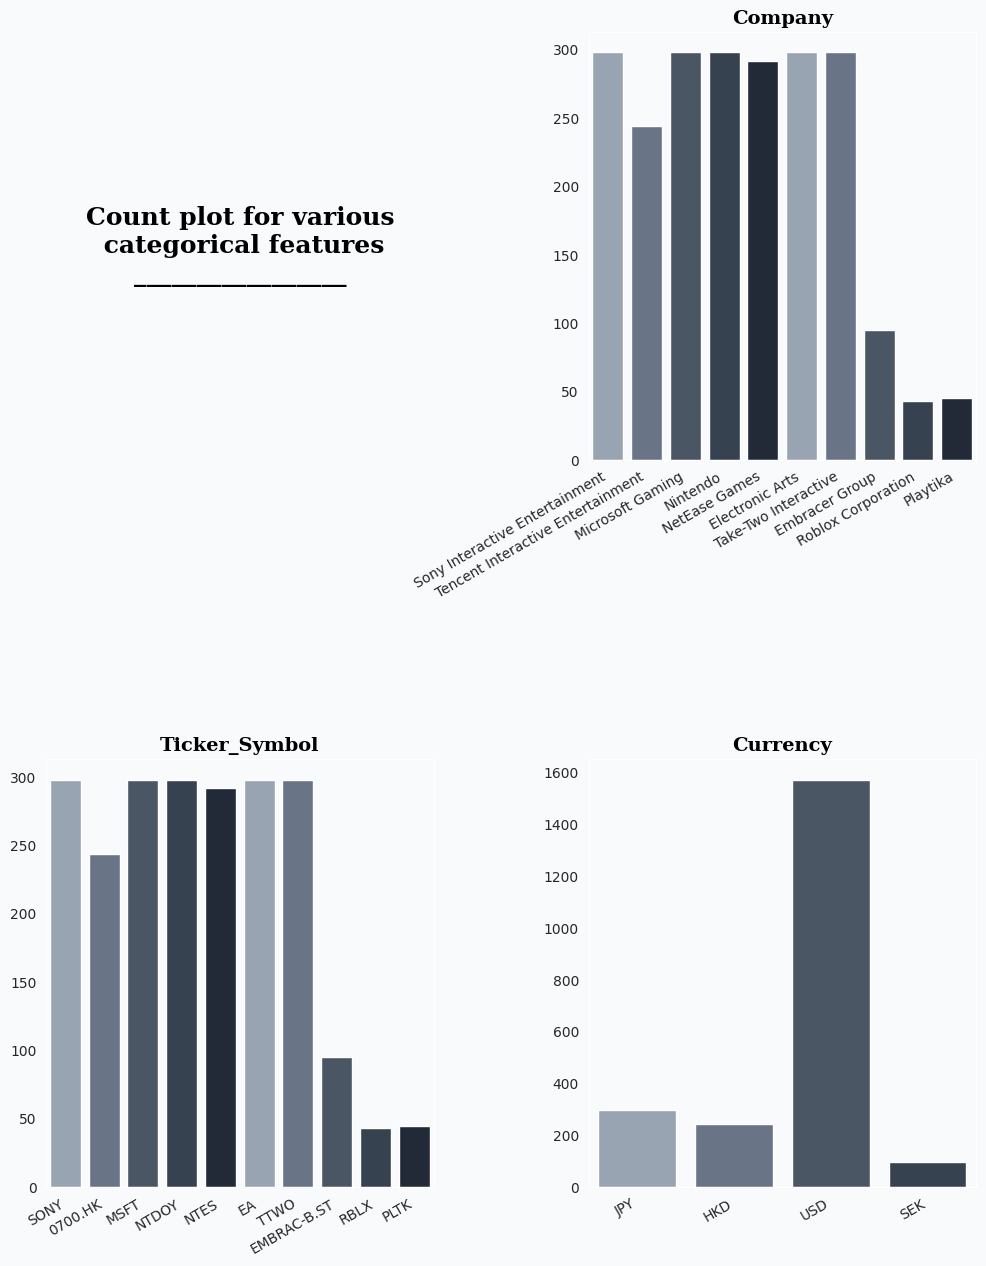

In [27]:
# Larger size for better visualization
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(2, 2)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  


background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(2) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['Company', 'Ticker_Symbol', 'Currency']
titles = ['Company', 'Ticker_Symbol', 'Currency']

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

# Plot stock prices over time

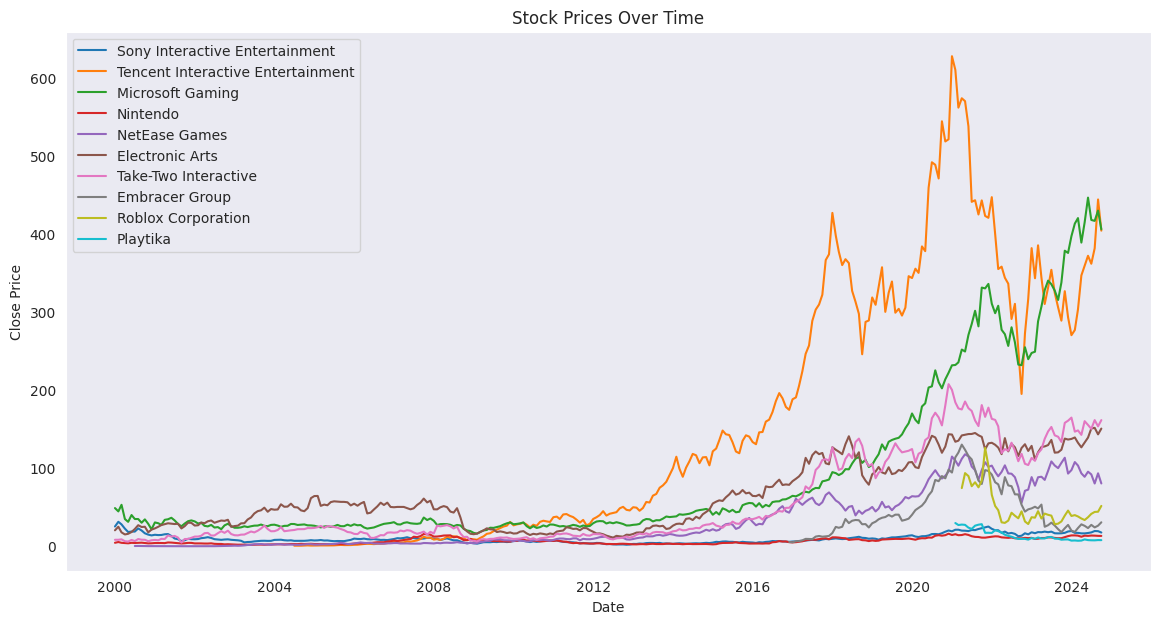

In [28]:
# Plot stock prices over time
plt.figure(figsize=(14, 7))
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

With this graph I can confirm several things:

1. **Microsoft Gaming** is slowly generating profits over the years.
2. **Tencent Interactive Entertainment** has had a pretty remarkable peak in 2020, I think it was because of "Call of Duty Online".
3. **Nintendo** is neither going up nor down, it has been stable in recent years.


## Bivariate Analysis

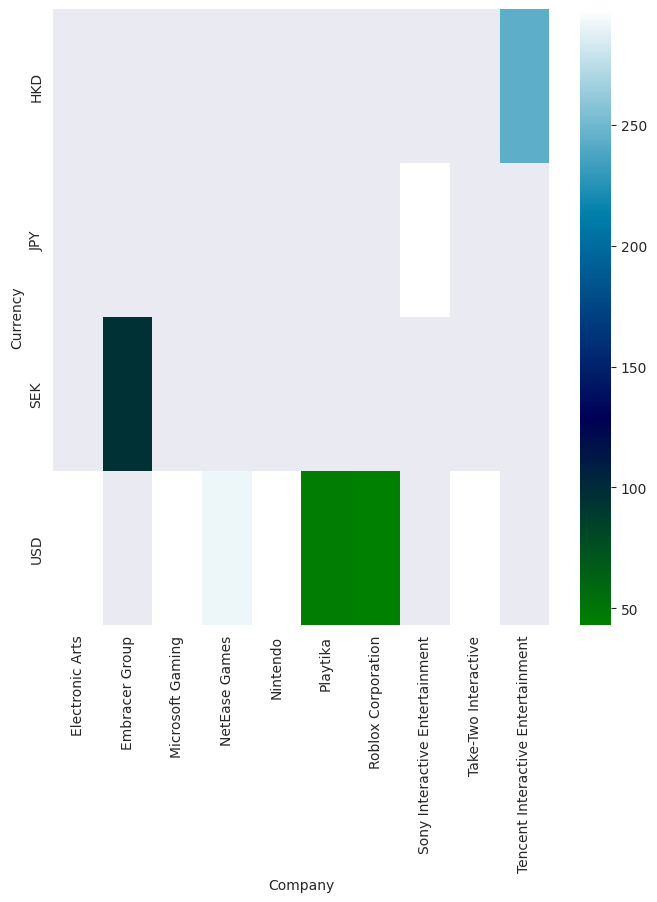

In [31]:
# Currency vs Company
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Currency'].value_counts()
    for x_label, grp in data.groupby('Company')
})
sns.heatmap(df_2dhist, cmap='ocean')
plt.xlabel('Company')
_ = plt.ylabel('Currency')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

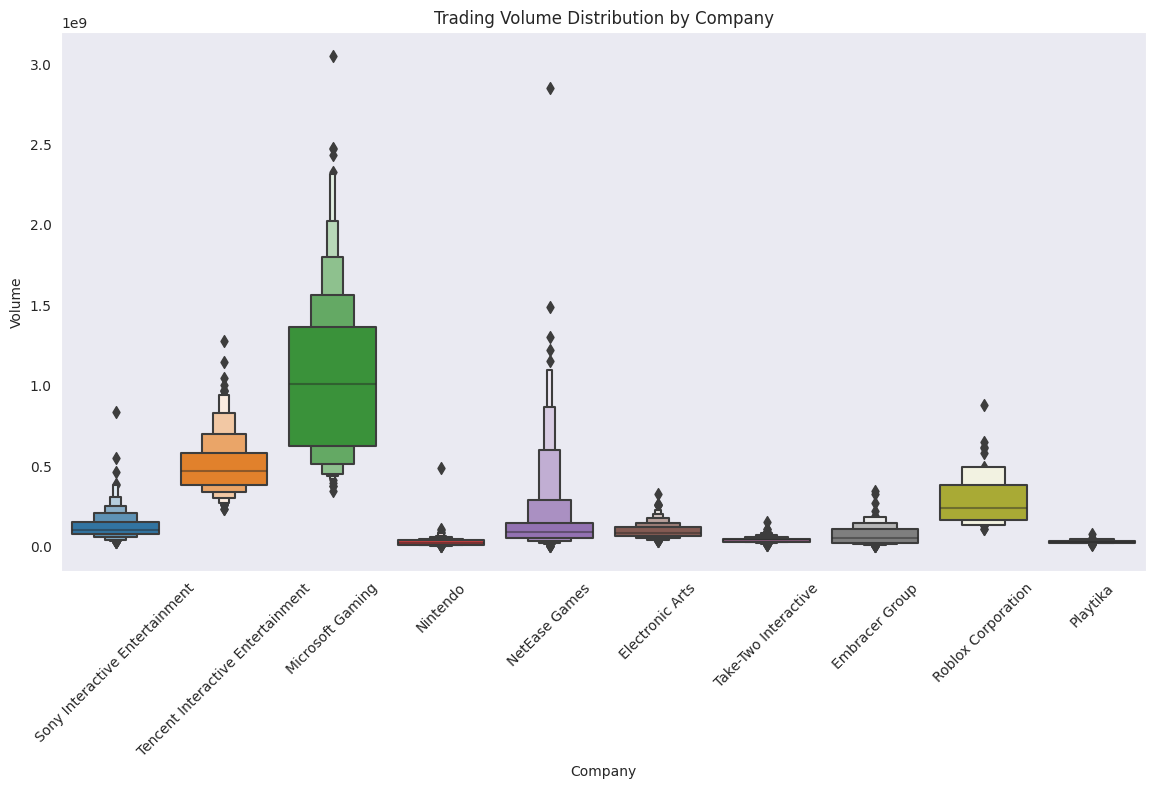

In [34]:
# Trading Volume Distribution by Company
plt.figure(figsize=(14, 7))
sns.boxenplot(x='Company', y='Volume', data=data)
plt.title('Trading Volume Distribution by Company')
plt.xticks(rotation=45)
plt.show()

Let's analyze the trading volume to understand the market activity for each company

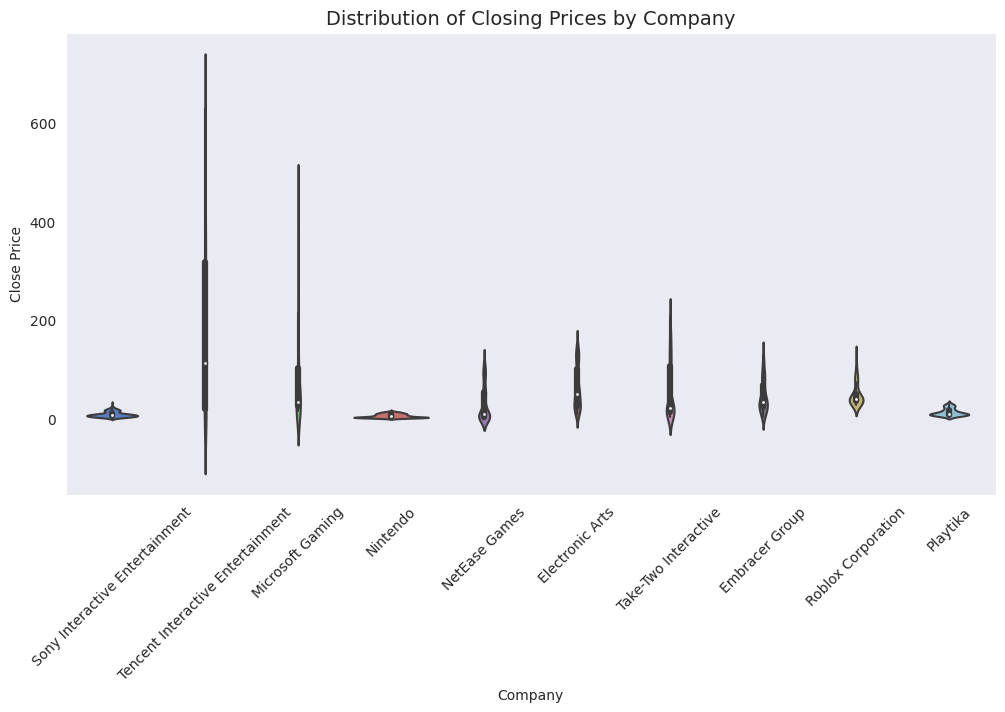

In [44]:
# Distribution of Closing Prices by Company
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Company', y='Close', palette='muted')
plt.title('Distribution of Closing Prices by Company', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

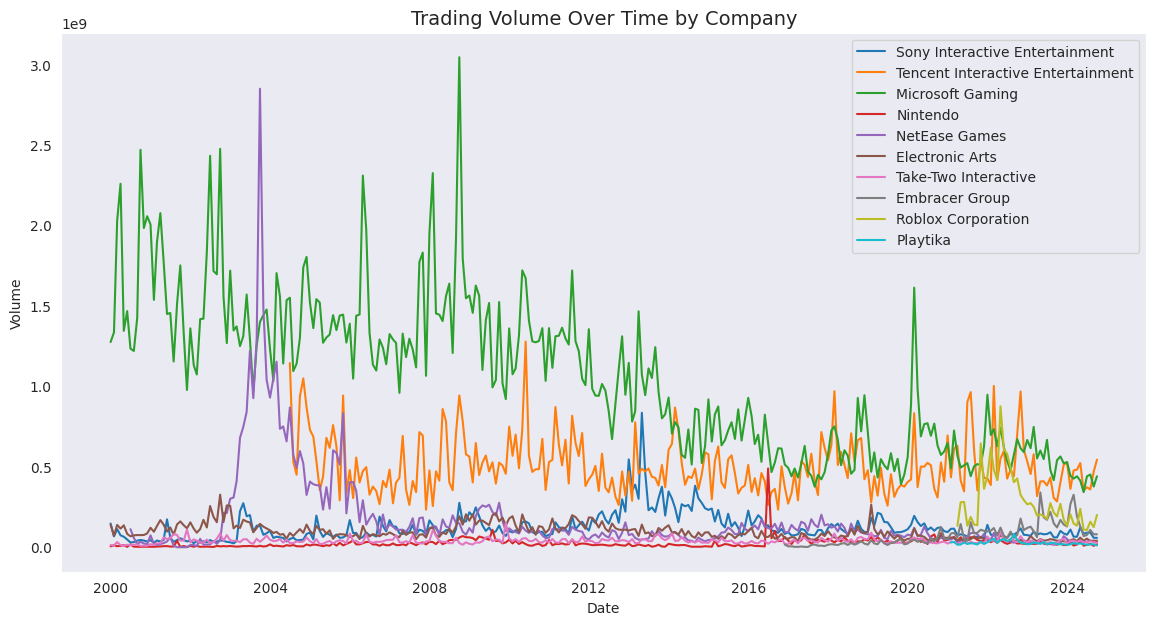

In [46]:
# Trading Volume Over Time by Company
plt.figure(figsize=(14, 7))
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=company)
plt.title('Trading Volume Over Time by Company', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

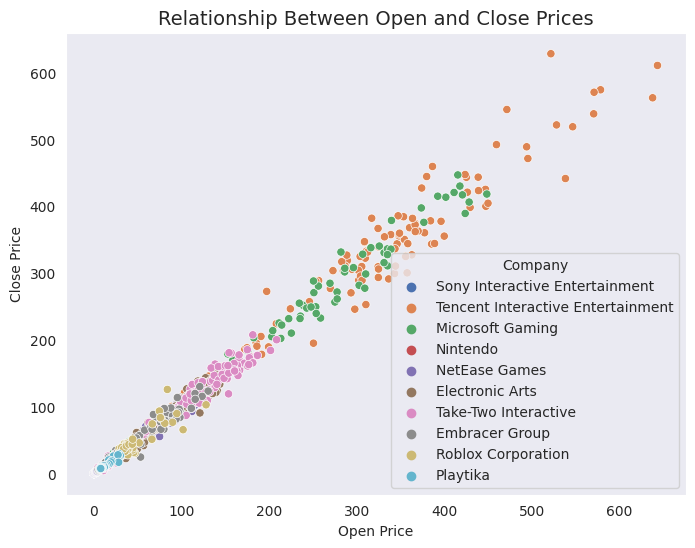

In [47]:
# Relationship Between Open and Close Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Open', y='Close', hue='Company', palette='deep')
plt.title('Relationship Between Open and Close Prices', fontsize=14)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


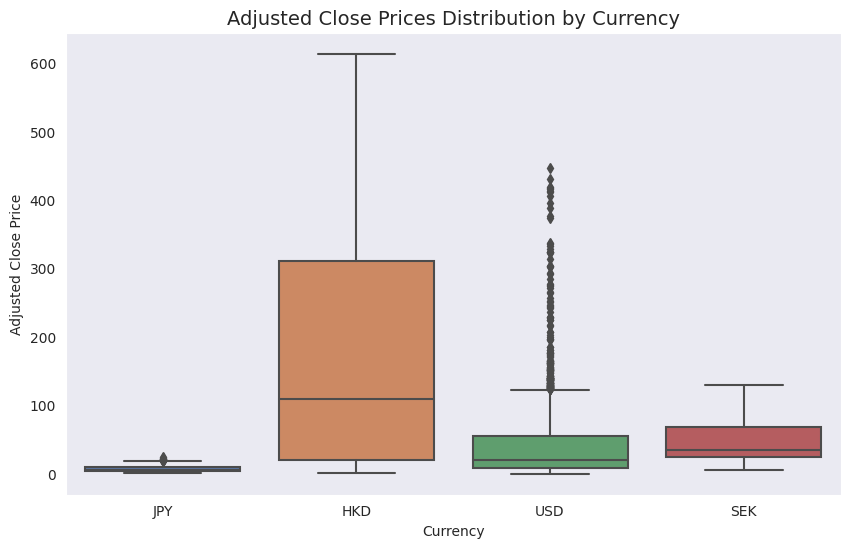

In [60]:
# Adjusted Close Prices Distribution by Currency
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Currency', y='Adj_Close', palette='deep')
plt.title('Adjusted Close Prices Distribution by Currency', fontsize=14)
plt.xlabel('Currency')
plt.ylabel('Adjusted Close Price')
plt.show()

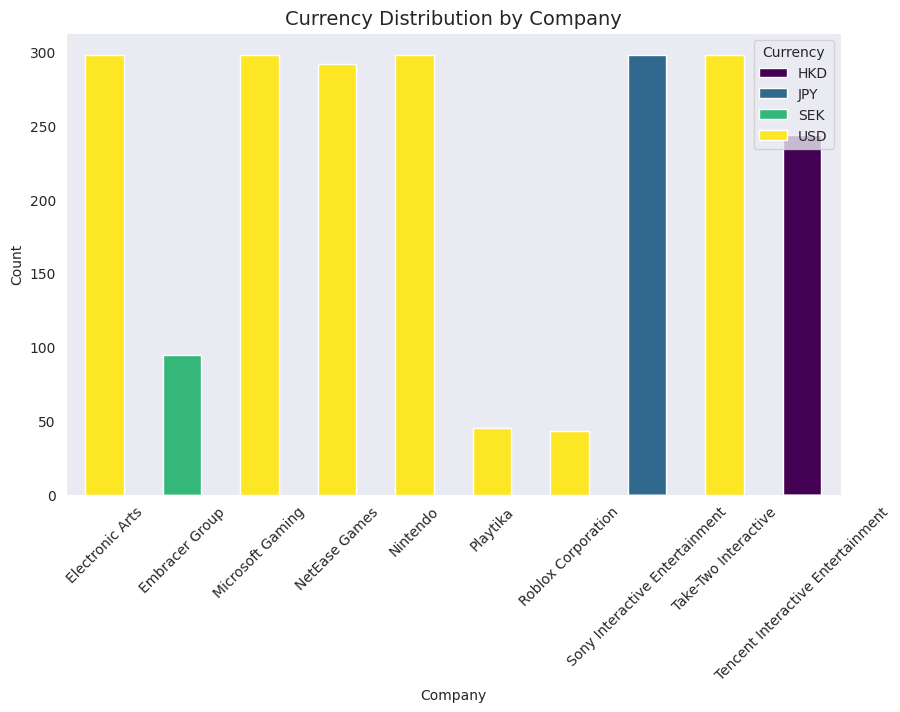

In [62]:
# Currency Distribution by Company
currency_distribution = data.groupby(['Company', 'Currency']).size().unstack()
currency_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Currency Distribution by Company', fontsize=14)
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Currency')
plt.show()

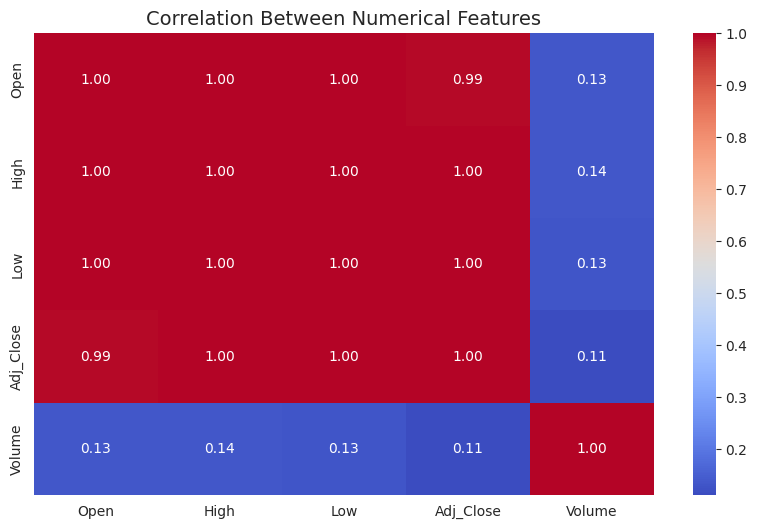

In [64]:
plt.figure(figsize=(10, 6))
correlation = data[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features', fontsize=14)
plt.show()

# Making features model ready
## Scaling and Encoding features

In [67]:
# Creating a copy of data
data_copy = data

# Define the columns to be encoded and scaled
cat_cols = ['Company', 'Ticker_Symbol', 'Currency']
num_cols = ['Open', 'High', 'Low', 'Adj_Close', 'Volume']

# Encoding the categorical columns
data_copy = pd.get_dummies(data_copy, columns = cat_cols, drop_first = True)

# Defining the feature and target
X = data_copy.drop(['Close'], axis=1)
y = data_copy[['Close']]

# Instantiating the Scaler
scaler = RobustScaler()

# Scaling the continuous features
X[num_cols] = scaler.fit_transform(X[num_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,Date,Open,High,Low,Adj_Close,Volume,Company_Embracer Group,Company_Microsoft Gaming,Company_NetEase Games,Company_Nintendo,...,Ticker_Symbol_MSFT,Ticker_Symbol_NTDOY,Ticker_Symbol_NTES,Ticker_Symbol_PLTK,Ticker_Symbol_RBLX,Ticker_Symbol_SONY,Ticker_Symbol_TTWO,Currency_JPY,Currency_SEK,Currency_USD
0,2000-01-01,0.126028,0.088917,0.016796,-0.085123,0.190723,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,2000-02-01,0.059952,0.132839,0.106158,-0.013079,-0.062648,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,2000-03-01,0.158235,0.129507,0.035099,-0.052822,0.081389,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,2000-04-01,0.120404,0.071419,0.048288,-0.117469,-0.041525,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,2000-05-01,0.006912,-0.019402,-0.049957,-0.169020,-0.070294,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


## Train and test split

In [68]:
print("=".center(50, "="))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is: ", X_train.shape)
print("The shape of X_test is: ",X_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)
print("=".center(50, "="))

The shape of X_train is:  (1767, 27)
The shape of X_test is:  (442, 27)
The shape of y_train is:  (1767, 1)
The shape of y_test is:  (442, 1)


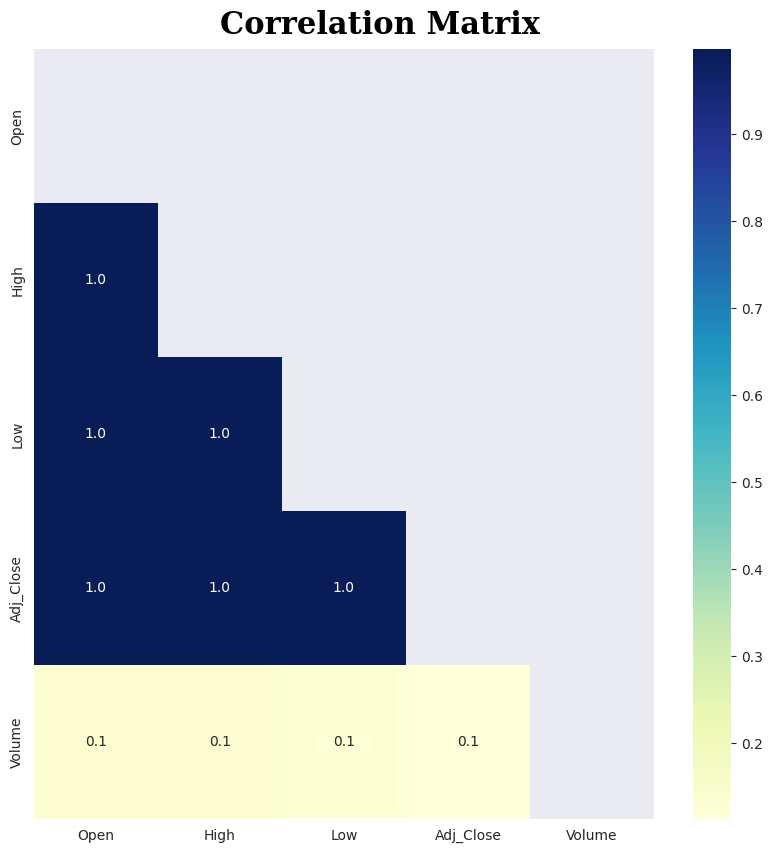

In [69]:
data_corr = data[num_cols].corr()
data_corr


fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#94a3b8","#64748b"]
mask = np.triu(np.ones_like(data_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = data[num_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

# Modeling


In [74]:
# Import necessary libraries
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score, 
    precision_score, recall_score, roc_auc_score, classification_report
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data
# Combine encoded categorical and numerical features
categorical_cols = ['Company', 'Ticker_Symbol', 'Currency']
numerical_cols = ['Open', 'High', 'Low', 'Adj_Close', 'Volume']

# Apply label encoding for categorical features
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define feature matrix (X) and target variable (y)
X = data[categorical_cols + numerical_cols]
y = data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numerical features
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# %% [markdown]
# ## Model Training and Evaluation

# Define models for comparison
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Support Vector Regression": SVR(kernel='rbf')
}

# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    
    # Evaluate model performance
    mae = np.mean(np.abs(y_test - y_pred))
    mse = np.mean((y_test - y_pred)**2)
    rmse = np.sqrt(mse)
    r2 = model.score(X_test, y_test)
    
    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2,
        "Time (s)": elapsed_time
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).transpose()
print(results_df)

# Define the parameter grid for tuning the model
param_grid = {
    # Reduce the number of trees
    'n_estimators': [100, 150, 200],  
    # Limit the depth of the trees
    'max_depth': [3, 5, 7],  
    # Increase the minimum samples required to split a node
    'min_samples_split': [10, 20, 30],  
    # Minimum samples required in a leaf
    'min_samples_leaf': [5, 10, 15],  
    # Limit the number of features considered for each split
    'max_features': ['sqrt', 'log2'],  
    # Ensure random sampling is used
    'bootstrap': [True, False],
    
    'max_features':[1.0]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV with cross-validation (increase cv to 10 for better generalization)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Evaluate the model on the test set with best parameters
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Metrics
mae_rf = np.mean(np.abs(y_test - y_pred_rf))
mse_rf = np.mean((y_test - y_pred_rf)**2)
rmse_rf = np.sqrt(mse_rf)
r2_rf = best_rf.score(X_test, y_test)

print(f"Random Forest Performance on Test Set:\nMAE: {mae_rf}\nMSE: {mse_rf}\nRMSE: {rmse_rf}\nR^2: {r2_rf}")

                                 MAE          MSE       RMSE       R^2  \
Linear Regression           1.215736     3.512005   1.874034  0.999527   
Decision Tree               1.373742     7.968985   2.822939  0.998927   
Random Forest               1.063615     5.397498   2.323252  0.999273   
Support Vector Regression  16.184535  2377.849511  48.763198  0.679931   

                           Time (s)  
Linear Regression          0.005228  
Decision Tree              0.015172  
Random Forest              0.894597  
Support Vector Regression  0.192286  
Best Parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': 1.0, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 16.601097110230764
Random Forest Performance on Test Set:
MAE: 1.2371761246504103
MSE: 6.597628984983366
RMSE: 2.568585016109719
R^2: 0.9991119314790016
